# Proyek Analisis Data: Air Quality
- **Nama:** Arya Dheffan Shevchenko
- **Email:** m200d4ky2013@bangkit.academy
- **ID Dicoding:** Arya Dheffan Shevchenko M200D4KY2013

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apakah terdapat perbedaan signifikan dalam tingkat polutan udara dalam musim yang berbeda
- Pertanyaan 2: Bagaimana pengaruh kecepatan angin(WSPM) dengan kualitas udara/fitur yang lain

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
data_aotizhongxin = pd.read_csv('data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
data_changping = pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv')
data_dingling = pd.read_csv('data/PRSA_Data_Dingling_20130301-20170228.csv')
data_dongsi = pd.read_csv('data/PRSA_Data_Dongsi_20130301-20170228.csv')
data_guanyuan = pd.read_csv('data/PRSA_Data_Guanyuan_20130301-20170228.csv')
data_gucheng = pd.read_csv('data/PRSA_Data_Gucheng_20130301-20170228.csv')
data_huairou = pd.read_csv('data/PRSA_Data_Huairou_20130301-20170228.csv')
data_nongzhanguan = pd.read_csv('data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
data_shunyi = pd.read_csv('data/PRSA_Data_Shunyi_20130301-20170228.csv')
data_tiantan = pd.read_csv('data/PRSA_Data_Tiantan_20130301-20170228.csv')
data_wanliu = pd.read_csv('data/PRSA_Data_Wanliu_20130301-20170228.csv')
data_wanshouxigong = pd.read_csv('data/PRSA_Data_Wanshouxigong_20130301-20170228.csv')


In [3]:
data_aotizhongxin.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [4]:
data_changping.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [5]:
# Semua data memiliki kolom yang sama sehingga kita bisa menggabungkan semua data menjadi satu dataframe dan untuk
data = pd.concat([data_aotizhongxin, data_changping, data_dingling, data_dongsi, data_guanyuan, data_gucheng, data_huairou, data_nongzhanguan, data_shunyi, data_tiantan, data_wanliu, data_wanshouxigong])

In [6]:
# Total data
data.shape

(420768, 18)

In [7]:
data['month'].value_counts()

month
3     35712
5     35712
7     35712
8     35712
10    35712
12    35712
1     35712
4     34560
6     34560
9     34560
11    34560
2     32544
Name: count, dtype: int64

In [8]:
# Total data tiap kolom
data.count()

No         420768
year       420768
month      420768
day        420768
hour       420768
PM2.5      412029
PM10       414319
SO2        411747
NO2        408652
CO         400067
O3         407491
TEMP       420370
PRES       420375
DEWP       420365
RAIN       420378
wd         418946
WSPM       420450
station    420768
dtype: int64

In [9]:
data.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [10]:
# Deskripsi data
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Assessing Data

In [11]:
# Cek missing value
data.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [12]:
# Cek duplicate data
data.duplicated().sum()

0

In [13]:
# Additional : Menghapus kolom yang tidak diperlukan (bersifat categorical)
data_station = data['station']
data.drop(['No', 'wd', 'station'], axis=1, inplace=True)

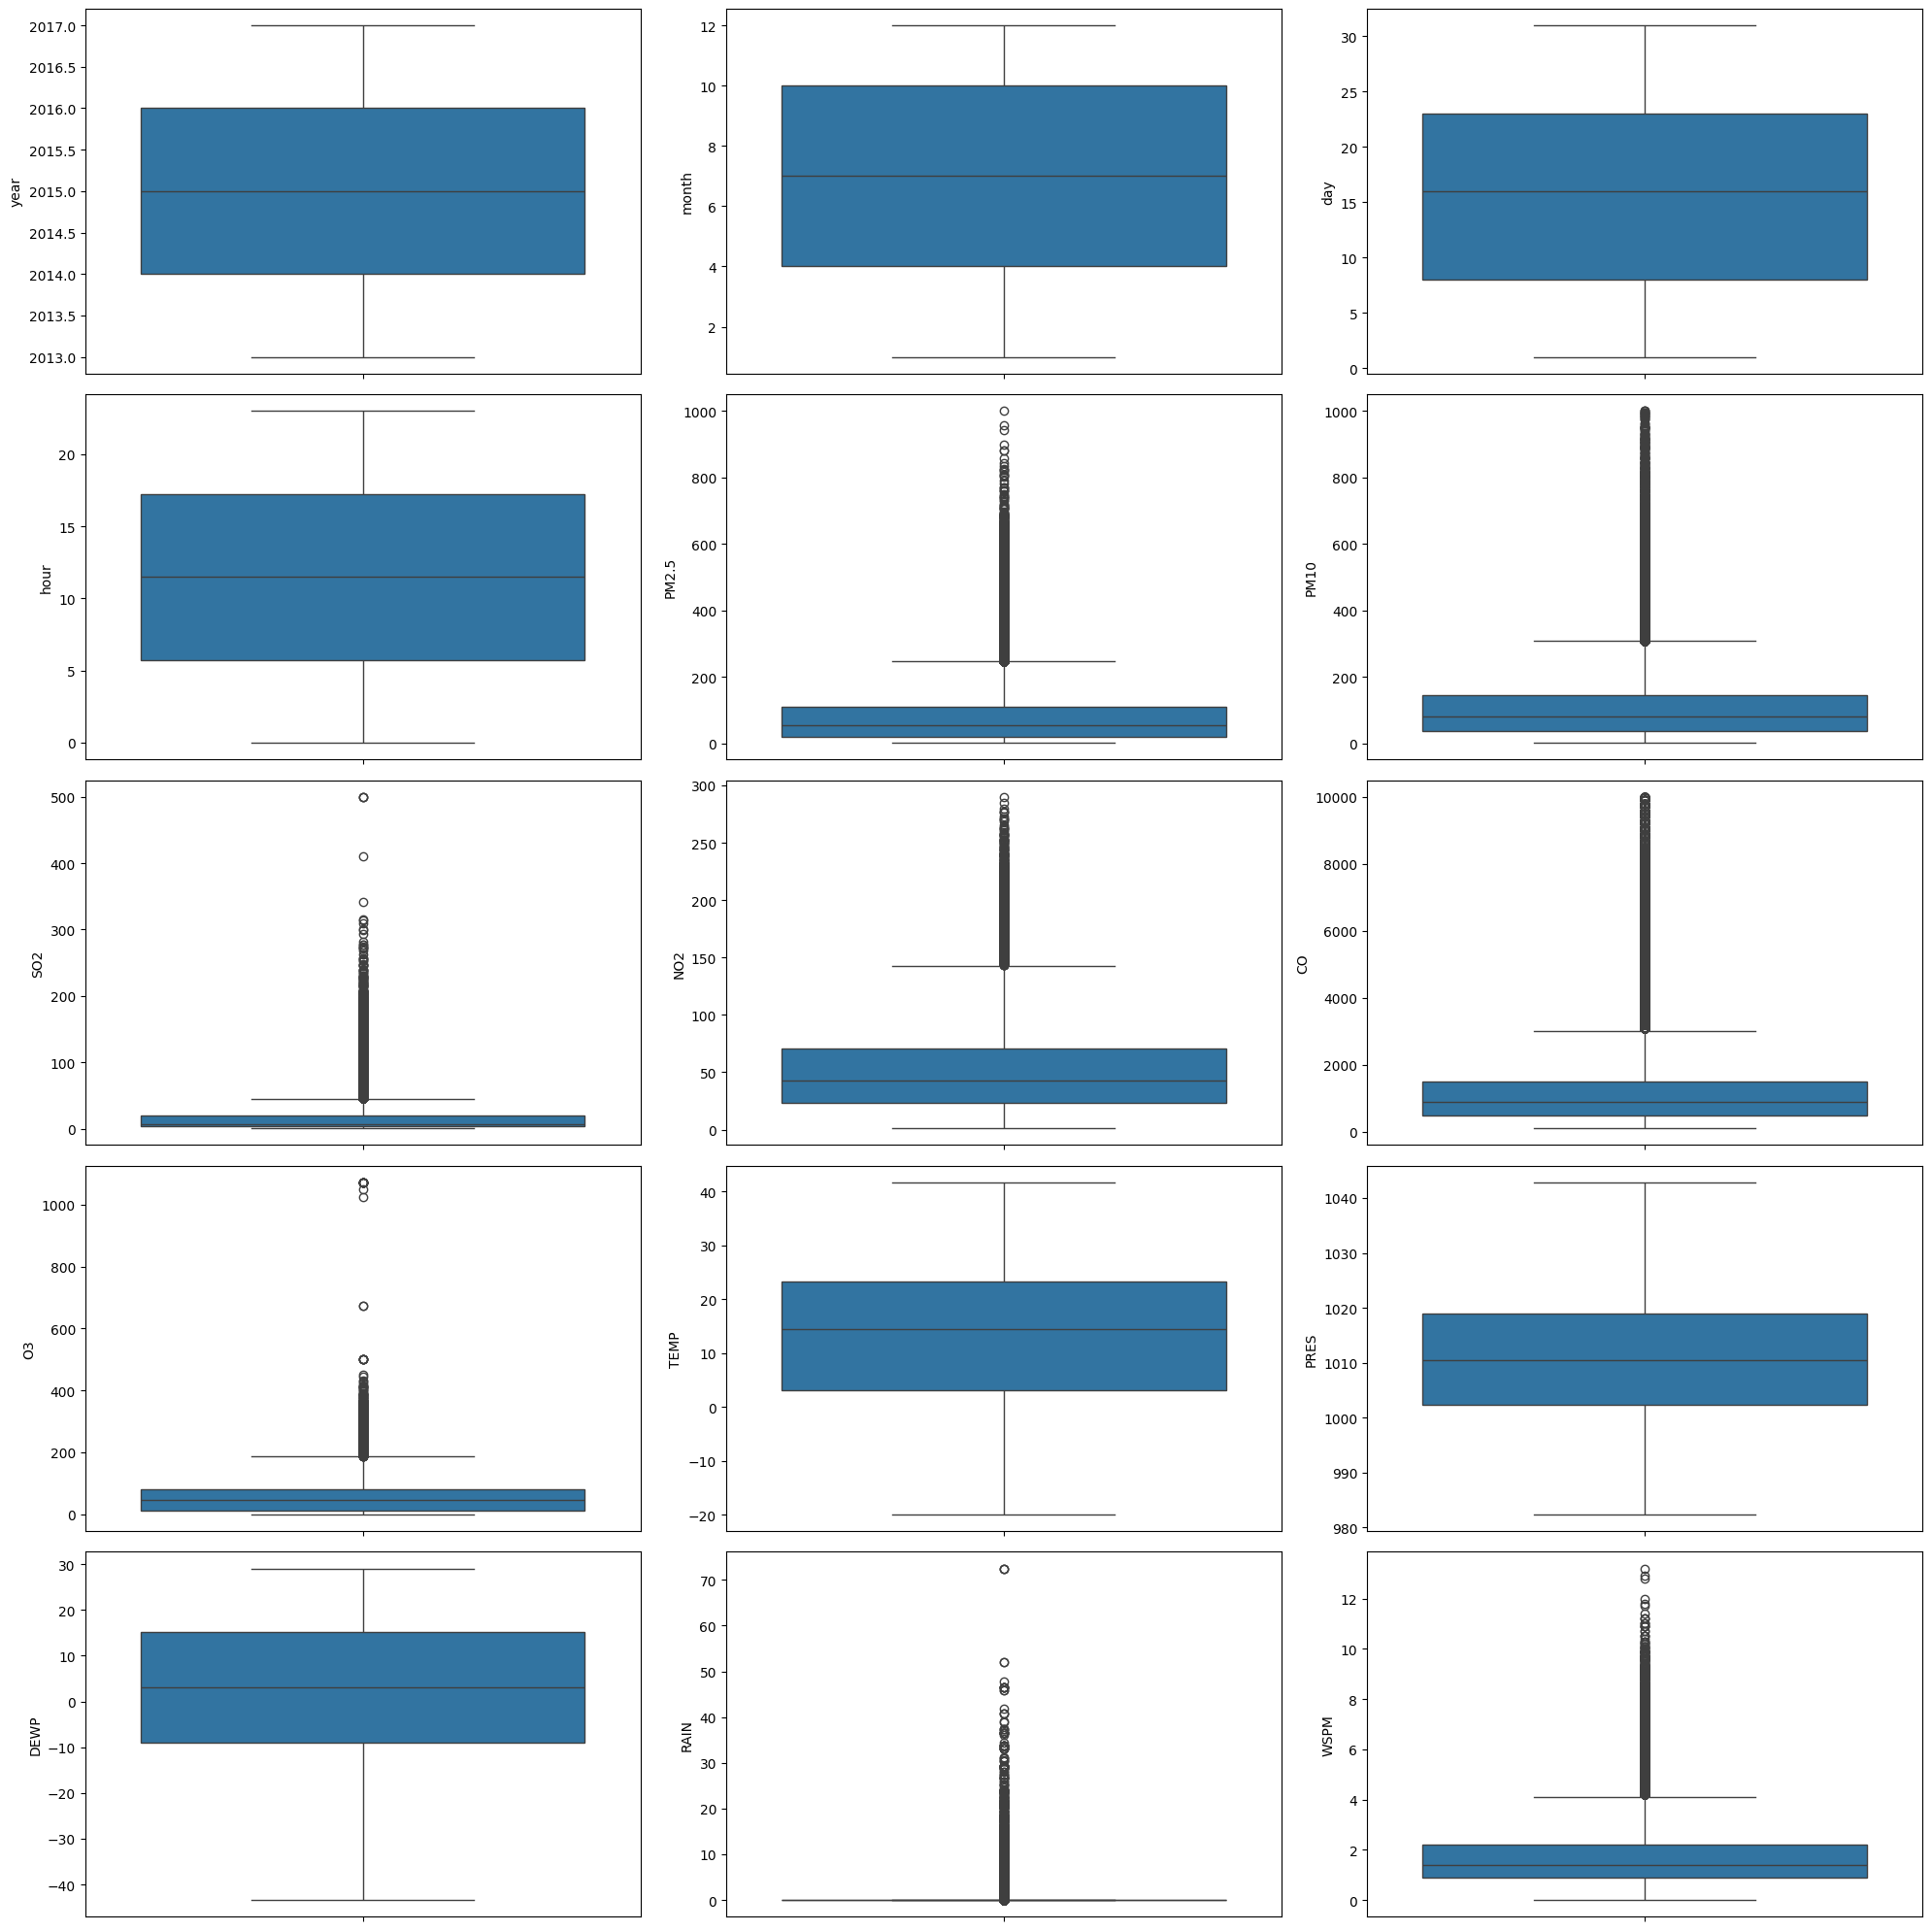

In [14]:
# Cek outlier
# Create a boxplot for each column in different subplots
fig, axes = plt.subplots(5, 3, figsize=(20, 20))
axes = axes.ravel()
for i, column in enumerate(data.columns):
    sns.boxplot(data[column], ax=axes[i])
plt.tight_layout()
plt.show()

### Cleaning Data

In [15]:
# Mode of 'rain' column and count it
data['RAIN'].mode()
data['RAIN'].value_counts()


RAIN
0.0     403858
0.1       3722
0.2       1841
0.3       1382
0.4        907
         ...  
36.1         1
18.2         1
26.7         1
18.9         1
22.4         1
Name: count, Length: 253, dtype: int64

In [16]:
# Mengganti missing value dengan nilai median()
data['PM2.5'] = data['PM2.5'].fillna(data['PM2.5'].median())
data['PM10'] = data['PM10'].fillna(data['PM10'].median())
data['SO2'] = data['SO2'].fillna(data['SO2'].median())
data['NO2'] = data['NO2'].fillna(data['NO2'].median())
data['CO'] = data['CO'].fillna(data['CO'].median())
data['O3'] = data['O3'].fillna(data['O3'].median())
data['TEMP'] = data['TEMP'].fillna(data['TEMP'].median())
data['PRES'] = data['PRES'].fillna(data['PRES'].median())
data['DEWP'] = data['DEWP'].fillna(data['DEWP'].median())

# Dikarenakan nilai modus dari kolom 'RAIN' adalah 0, maka kita akan mengganti missing value dengan 0
data['RAIN'] = data['RAIN'].fillna(0.0)
data['WSPM'] = data['WSPM'].fillna(data['WSPM'].median())


In [17]:
# Lakukan pengecekan kembali
data.isnull().sum()

year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

In [18]:
# Mengganti nilai outlier dengan nilai upperbound dan lowerbound
# Buat fungsi untuk mengganti nilai outlier
def replace_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    
# Gunakan fungsi untuk mengganti nilai outlier
for column in data.columns:
    replace_outlier(data, column)

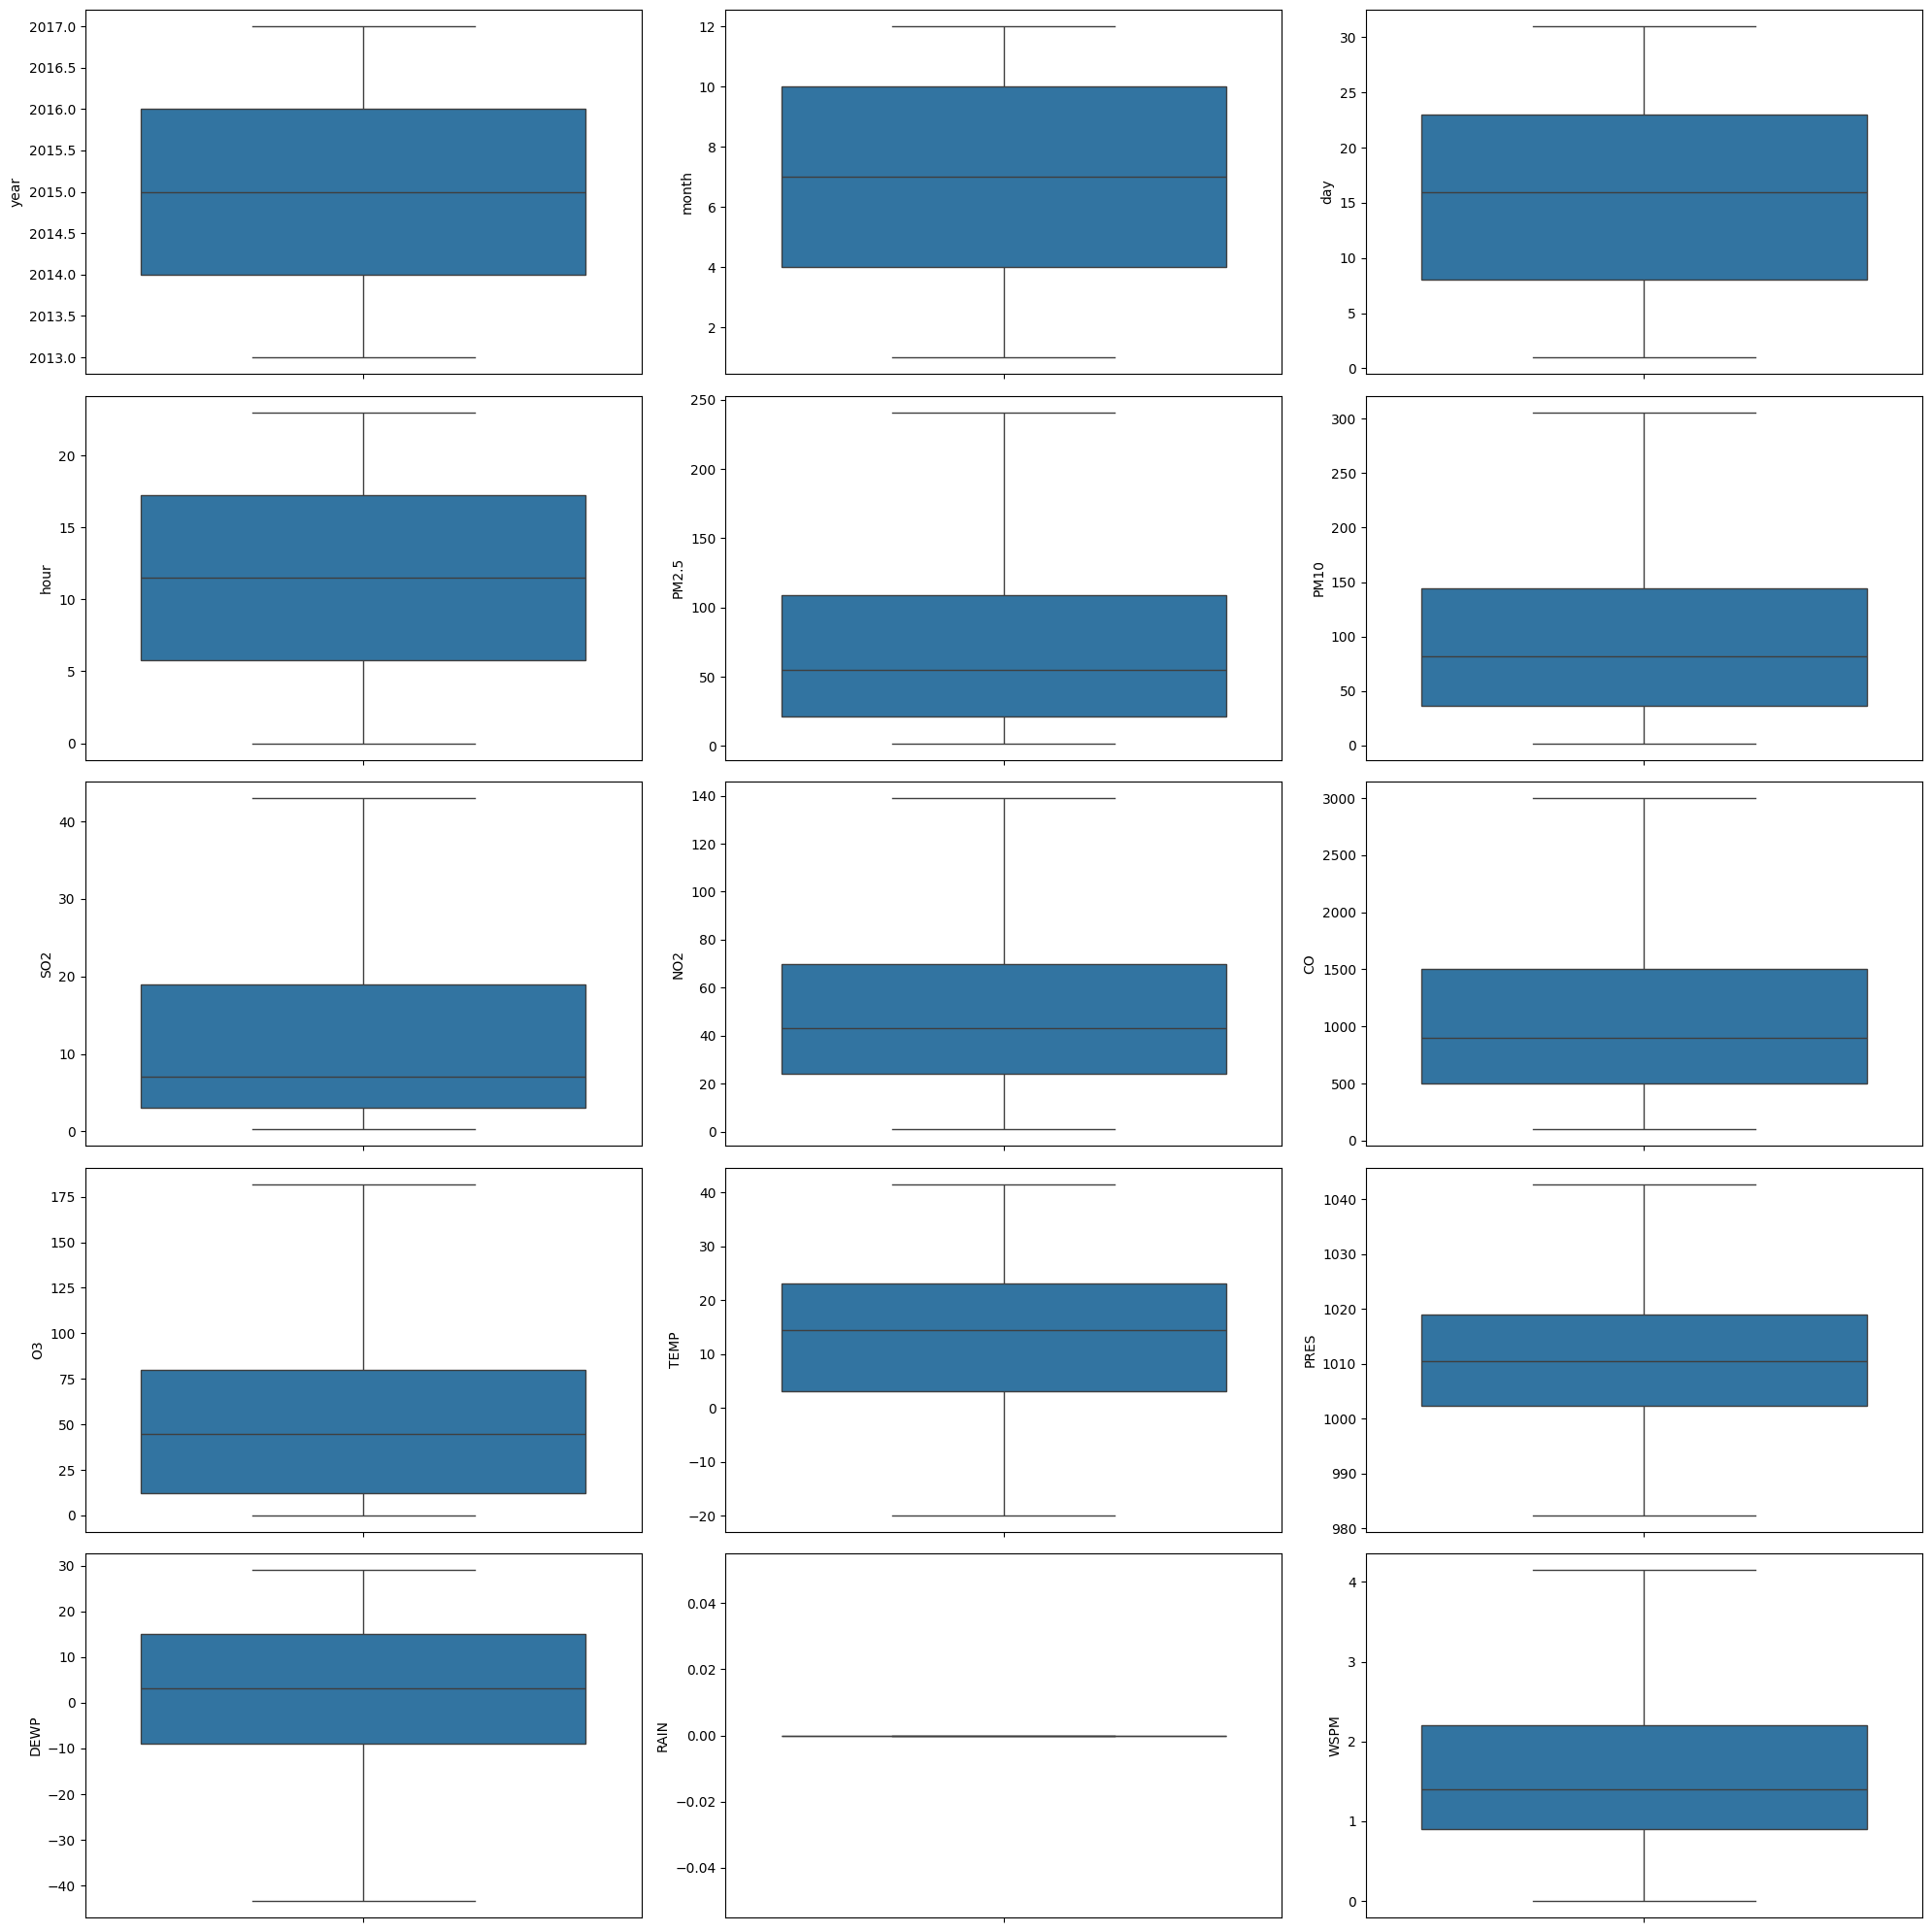

In [19]:
# Cek kembali outlier
fig, axes = plt.subplots(5, 3, figsize=(20, 20))
axes = axes.ravel()
for i, column in enumerate(data.columns):
    sns.boxplot(data[column], ax=axes[i])
plt.tight_layout()
plt.show()

In [20]:
data['station'] = data_station
data.to_csv('dashboard/PRSA_Data_20130301-20170228.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore Historgram dan Korelasi

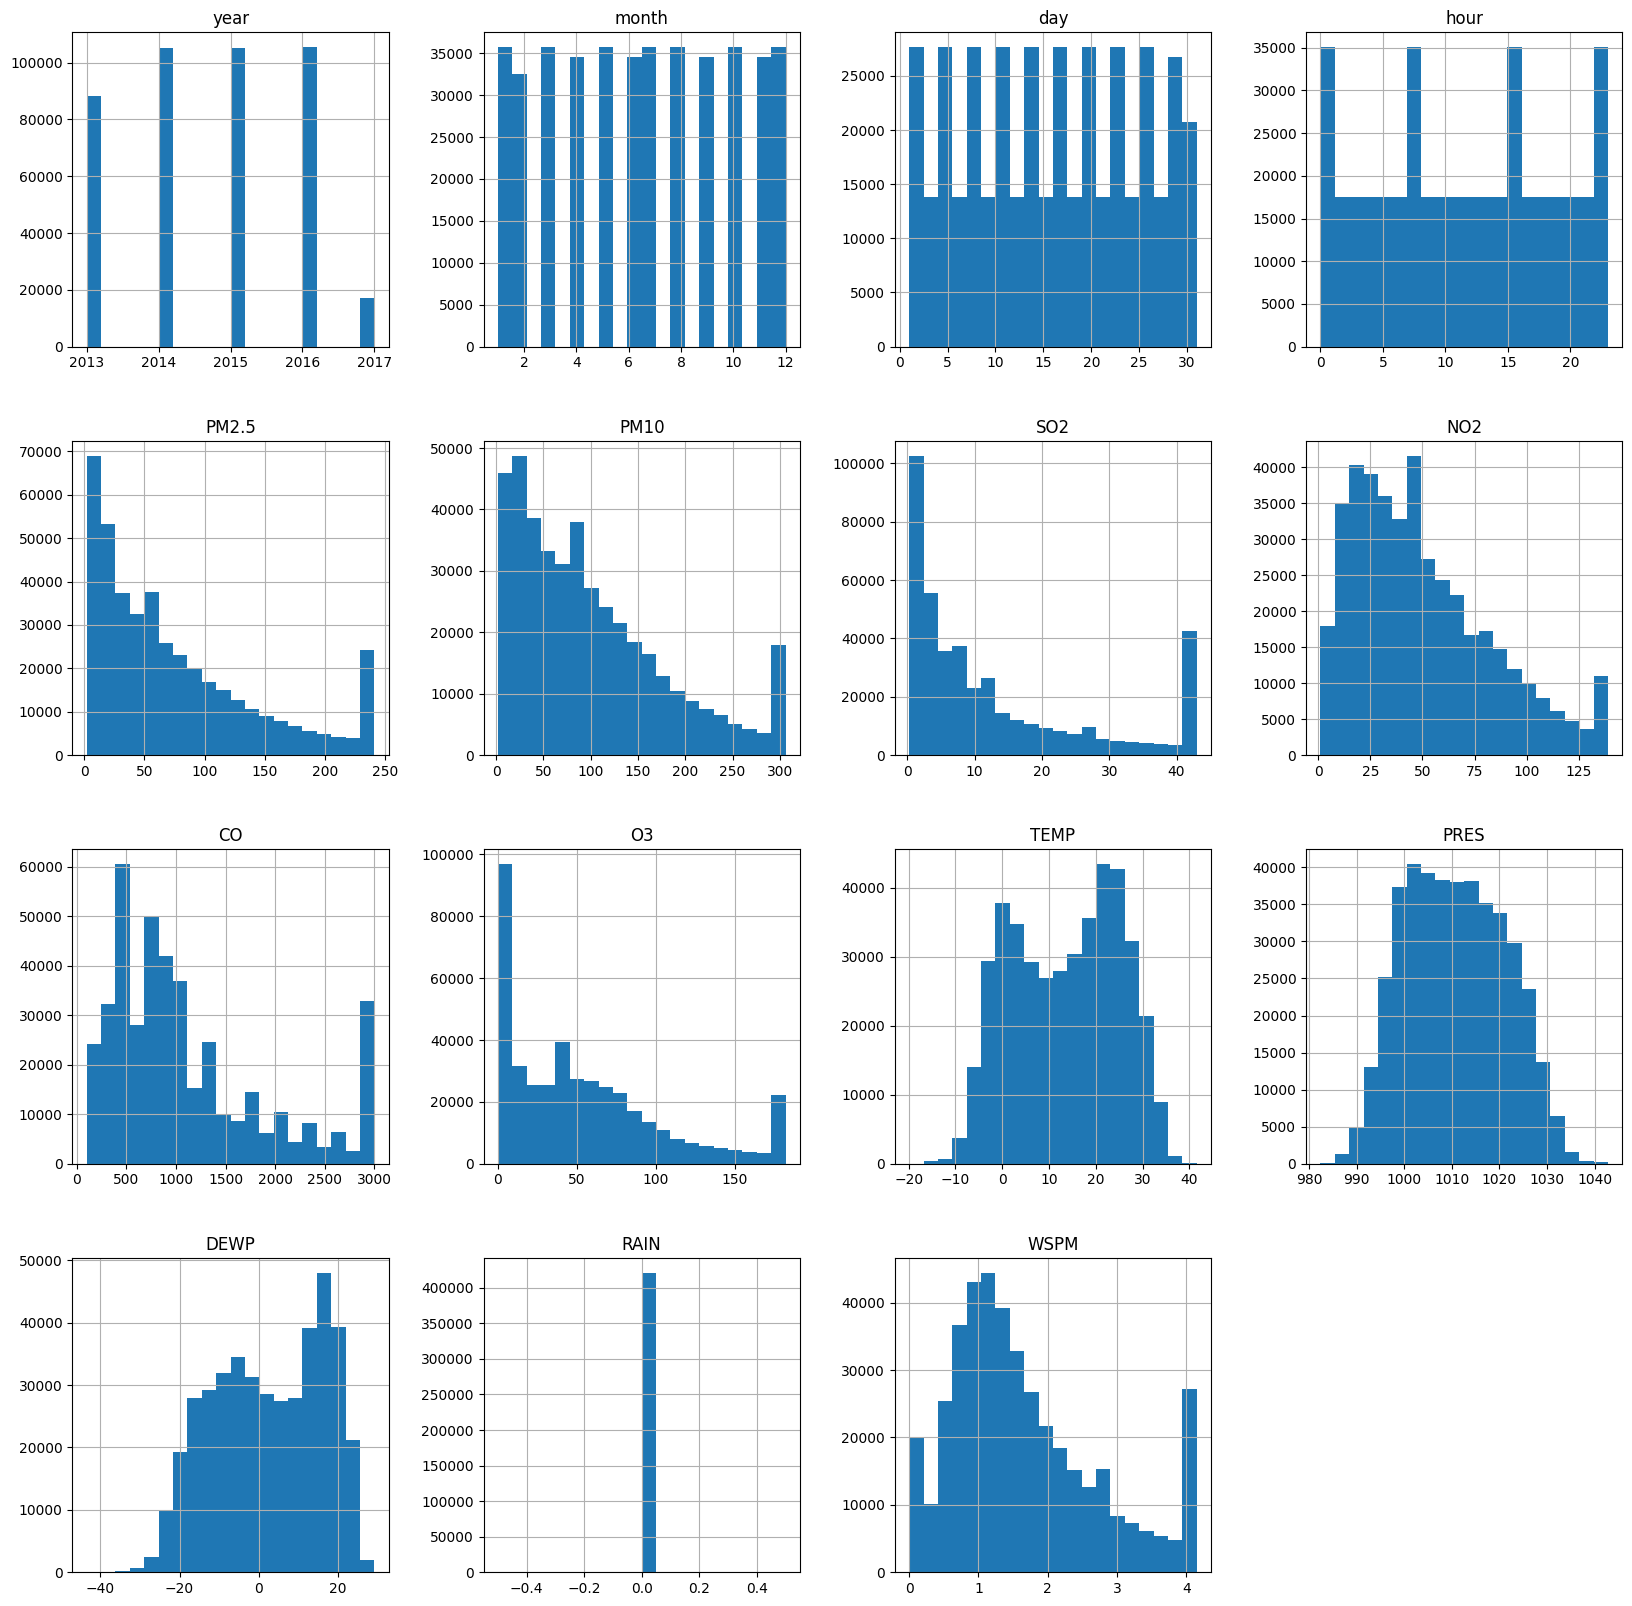

In [21]:
# Buat histogram untuk melihat distribusi data
data.hist(bins=20, figsize=(20, 20))
plt.show()

In [22]:
# Korelasi matrix
# Karena kolom 'RAIN' cuman memiliki satu nilai, maka kita akan menghapus kolom tersebut
# Drop fitur yang tidak diperlukan
data.drop(['year', 'day', 'hour', 'RAIN', 'station'], axis=1, inplace=True)
correlation = data.corr()
correlation = correlation.round(2)
correlation

,month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
month,1.00,0.01,-0.03,-0.21,0.04,0.03,-0.12,0.13,-0.01,0.27,-0.15
PM2.5,0.01,1.00,0.89,0.51,0.65,0.79,-0.17,-0.11,-0.00,0.15,-0.30
PM10,-0.03,0.89,1.00,0.50,0.66,0.71,-0.13,-0.08,-0.03,0.10,-0.23
SO2,-0.21,0.51,0.50,1.00,0.53,0.59,-0.18,-0.36,0.26,-0.31,-0.11
NO2,0.04,0.65,0.66,0.53,1.00,0.72,-0.51,-0.28,0.17,-0.03,-0.42
CO,0.03,0.79,0.71,0.59,0.72,1.00,-0.36,-0.31,0.18,-0.02,-0.35
O3,-0.12,-0.17,-0.13,-0.18,-0.51,-0.36,1.00,0.60,-0.45,0.31,0.34
TEMP,0.13,-0.11,-0.08,-0.36,-0.28,-0.31,0.60,1.00,-0.81,0.82,0.06
PRES,-0.01,-0.00,-0.03,0.26,0.17,0.18,-0.45,-0.81,1.00,-0.75,0.06
DEWP,0.27,0.15,0.10,-0.31,-0.03,-0.02,0.31,0.82,-0.75,1.00,-0.29


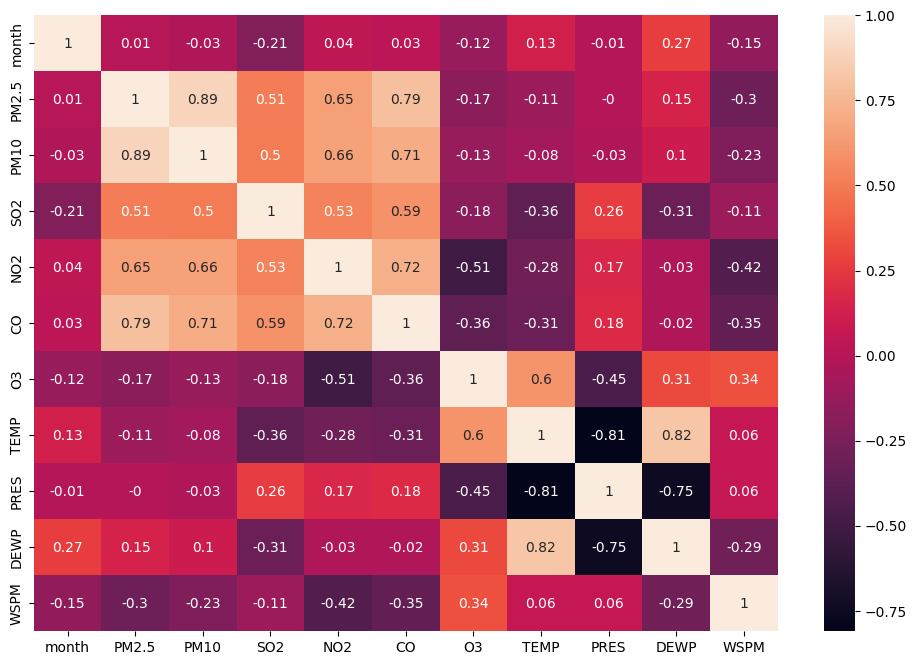

In [23]:
# Heatmap untuk melihat korelasi antar kolom
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True)
plt.show()

In [24]:
# Kelompokkan data berdasarkan musim
# Spring : 1-3
# Summer : 4-6
# Fall : 7-9
# Winter : 10-12
# Buat fungsi untuk mengelompokkan data berdasarkan musim
# Buat 4 kolom season dan mean
def season(data):
    if data['month'] in [1, 2, 3]:
        return 'Spring'
    elif data['month'] in [4, 5, 6]:
        return 'Summer'
    elif data['month'] in [7, 8, 9]:
        return 'Fall'
    else:
        return 'Winter'

data['season'] = data.apply(season, axis=1)

# Buat dataframe baru untuk menampung data berdasarkan musim khusus untuk kolom 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM'
season_data = data.groupby('season').mean()
season_data = season_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']]

In [25]:
# Cek data berdasarkan musim
season_data

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
season,,,,,,,,,,
Fall,61.883927,78.493635,5.466188,39.154309,879.985941,75.000528,24.906033,1002.615111,17.635844,1.424269
Spring,84.419935,111.140143,21.706767,56.434477,1339.748374,39.909152,2.645110,1018.715697,-11.817745,1.864113
Summer,67.374860,101.785957,11.206565,42.934373,859.761638,80.998600,20.466492,1003.335181,7.551302,1.865528
Winter,87.652204,112.413737,14.306849,61.356163,1386.936707,24.612938,6.009956,1018.391668,-3.620965,1.524787


## Visualization & Explanatory Analysis

### Pertanyaan 1:

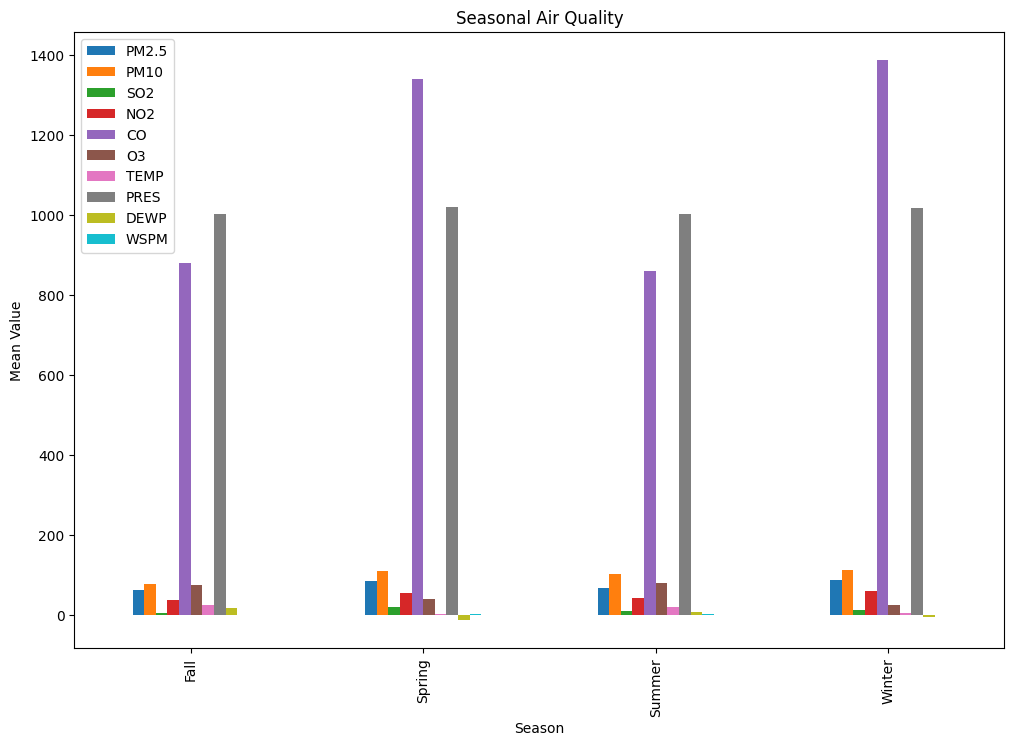

In [26]:
# Buat bar graph untuk melihat perbandingan data berdasarkan musim
season_data.plot(kind='bar', figsize=(12, 8))
plt.title('Seasonal Air Quality')
plt.ylabel('Mean Value')
plt.xlabel('Season')
plt.show()

### Pertanyaan 2:

In [27]:
# Buat urutan korelasi pengaruh WPSM terhadapa fitur lainnya

correlation['WSPM'].sort_values(ascending=False)

WSPM     1.00
O3       0.34
TEMP     0.06
PRES     0.06
SO2     -0.11
month   -0.15
PM10    -0.23
DEWP    -0.29
PM2.5   -0.30
CO      -0.35
NO2     -0.42
Name: WSPM, dtype: float64

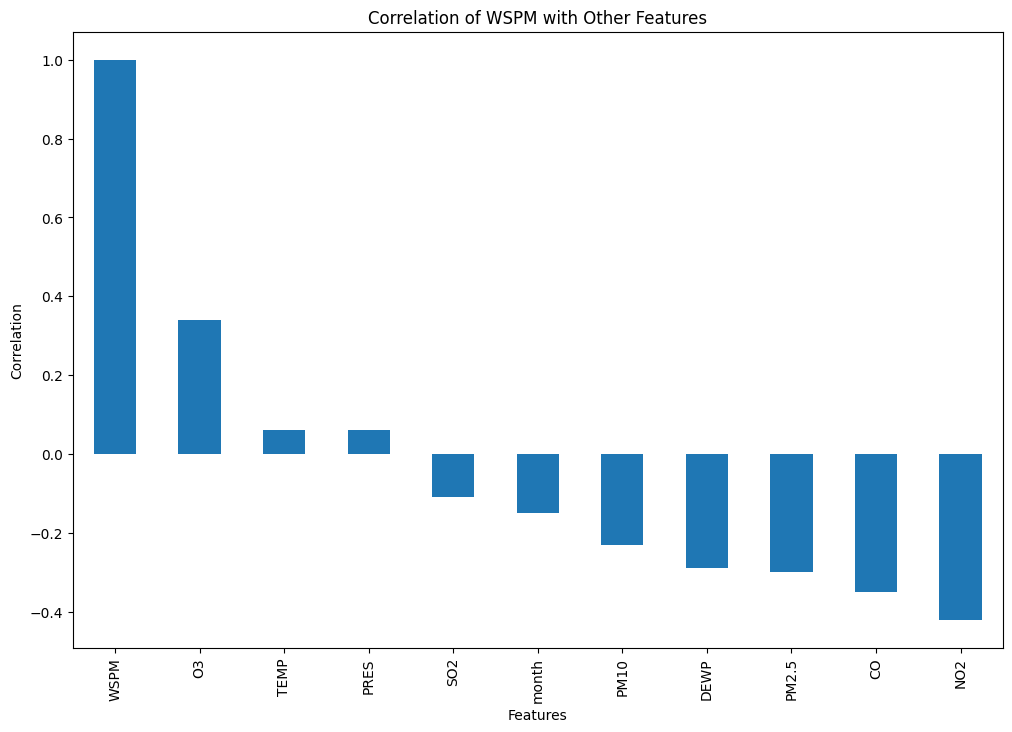

In [28]:
# Visualisasi korelasi WSPM terhadap fitur lainnya
plt.figure(figsize=(12, 8))
correlation['WSPM'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of WSPM with Other Features')
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.show()

## Conclusion

- Dari visualisasi data tersebut, kita dapat menyimpulkan beberapa hal:

Polusi Partikulat (PM2.5 dan PM10): PM10 memiliki nilai rata-rata yang lebih tinggi daripada PM2.5 di setiap musim, yang bertentangan dengan kesimpulan sebelumnya. Ini menunjukkan bahwa partikel yang lebih besar (PM10) mungkin lebih dominan di udara daripada partikel halus (PM2.5).

Polutan Gas (SO2, NO2, CO, O3): NO2 dan CO memiliki kenaikan yang signifikan di musim dingin dibandingkan dengan musim lain, yang mungkin menunjukkan aktivitas yang meningkat yang berhubungan dengan sumber emisi ini, seperti pemanasan atau lalu lintas kendaraan. SO2 memiliki konsentrasi yang lebih rendah secara keseluruhan, dan O3 menunjukkan nilai yang lebih tinggi di musim gugur dan musim panas.

Faktor Iklim (TEMP, PRES, DEWP, WSPM): TEMP mengalami fluktuasi sesuai dengan perubahan musim, yang terlihat dari nilai yang lebih tinggi di musim panas dan lebih rendah di musim dingin. PRES dan DEWP menunjukkan variasi kecil antar musim. Kecepatan angin (WSPM) cenderung stabil di semua musim.

Musim Panas vs. Musim Dingin: Secara keseluruhan, PM10, NO2, dan CO mencapai nilai rata-rata tertinggi mereka di musim dingin, yang mungkin disebabkan oleh faktor-faktor seperti pemanasan dan perubahan kondisi atmosfer yang mempengaruhi dispersi polutan.

Tekanan Udara dan Titik Embun (PRES, DEWP): Ada variasi musiman dalam tekanan udara dan titik embun, dengan musim dingin yang menunjukkan nilai PRES yang lebih tinggi dan nilai DEWP negatif, yang menunjukkan kondisi yang lebih kering.


- Dari urutan korelasi, kita dapat menyimpulkan:

O3 (Ozon): Korelasi positif paling kuat dengan WSPM (0.34), menunjukkan bahwa peningkatan kecepatan angin mungkin berhubungan dengan peningkatan konsentrasi ozon. Ini bisa terjadi karena kecepatan angin yang lebih tinggi membantu menyebar dan mengaduk polutan, yang mungkin menyebabkan produksi ozon dari prekursor kimianya.

TEMP (Suhu) dan PRES (Tekanan Udara): Kedua memiliki korelasi yang sangat rendah tetapi positif (0.06) dengan WSPM, yang berarti tidak ada hubungan yang kuat antara kecepatan angin dan suhu atau tekanan udara.

SO2 (Dioksida Sulfur): Memiliki korelasi negatif kecil (-0.11) dengan WSPM, menunjukkan bahwa kecepatan angin yang lebih tinggi mungkin sedikit berkaitan dengan penurunan konsentrasi SO2.

PM10 dan PM2.5: Partikulat ini memiliki korelasi negatif dengan WSPM, dengan nilai -0.23 dan -0.30, masing-masing. Ini menunjukkan bahwa ketika kecepatan angin meningkat, konsentrasi partikel di udara cenderung menurun, mungkin karena angin membantu menyebarkan partikel-partikel tersebut.

DEWP (Titik Embun): Dengan korelasi negatif (-0.29), ini bisa berarti bahwa kecepatan angin yang lebih tinggi terkait dengan kelembaban yang lebih rendah atau kondisi yang lebih kering.

CO (Karbon Monoksida) dan NO2 (Dioksida Nitrogen): Mereka memiliki korelasi negatif yang lebih kuat (-0.35 dan -0.42), menunjukkan bahwa peningkatan kecepatan angin mungkin efektif dalam mengurangi konsentrasi gas-gas ini di udara.